# Importing the packages required

In [86]:
import geopandas
import georasters as gr
import fiona
import pandas as pd
import geopy
import pyproj
import shapely
import osr
import rasterio as rio
import gdal
import os
import pygis
import richdem as rd
import earthpy as et
%matplotlib inline

In [87]:
dsmfile = 'D:/BeCode/Maps/DSM_DHMVIIDSMRAS1m_k01/GeoTIFF/DHMVIIDSMRAS1m_k01.tif' #DSM
dtmfile = 'D:/BeCode/Maps/DTM_DHMVIIDTMRAS1m_k01/GeoTIFF/DHMVIIDTMRAS1m_k01.tif' #DTM

# Getting Raster Metadata


In [88]:
dsm = gdal.Open(dsmfile)
dtm = gdal.Open(dtmfile)
print (dsm.GetMetadata())
print (dtm.GetMetadata())

{'AREA_OR_POINT': 'Area', 'VERTICAL_SRS': 'EPSG:5110'}
{'AREA_OR_POINT': 'Area', 'VERTICAL_SRS': 'EPSG:5110'}


In [89]:
print(dsm.RasterCount)
print(dtm.RasterCount)

1
1


In [90]:
print(dsm.GetDescription())
print(dtm.GetDescription())

D:/BeCode/Maps/DSM_DHMVIIDSMRAS1m_k01/GeoTIFF/DHMVIIDSMRAS1m_k01.tif
D:/BeCode/Maps/DTM_DHMVIIDTMRAS1m_k01/GeoTIFF/DHMVIIDTMRAS1m_k01.tif


In [91]:
print(dsm.RasterXSize,dsm.RasterYSize )
print(dtm.RasterXSize,dtm.RasterYSize )

17000 9000
17000 9000


In [92]:
print(dsm.GetProjection())

PROJCS["Belge 1972 / Belgian Lambert 72",GEOGCS["Belge 1972",DATUM["Reseau_National_Belge_1972",SPHEROID["International 1924",6378388,297,AUTHORITY["EPSG","7022"]],TOWGS84[-106.869,52.2978,-103.724,0.3366,-0.457,1.8422,-1.2747],AUTHORITY["EPSG","6313"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4313"]],PROJECTION["Lambert_Conformal_Conic_2SP"],PARAMETER["standard_parallel_1",51.16666723333333],PARAMETER["standard_parallel_2",49.8333339],PARAMETER["latitude_of_origin",90],PARAMETER["central_meridian",4.367486666666666],PARAMETER["false_easting",150000.013],PARAMETER["false_northing",5400088.438],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["X",EAST],AXIS["Y",NORTH],AUTHORITY["EPSG","31370"]]


# Get Raster Metadata

In [93]:
dsm = gdal.Open(dsmfile)
dtm = gdal.Open(dtmfile)
print (dsm.GetMetadata())
print (dtm.GetMetadata())

{'AREA_OR_POINT': 'Area', 'VERTICAL_SRS': 'EPSG:5110'}
{'AREA_OR_POINT': 'Area', 'VERTICAL_SRS': 'EPSG:5110'}


In [94]:
print(dsm.GetDescription())
print(dtm.GetDescription())

D:/BeCode/Maps/DSM_DHMVIIDSMRAS1m_k01/GeoTIFF/DHMVIIDSMRAS1m_k01.tif
D:/BeCode/Maps/DTM_DHMVIIDTMRAS1m_k01/GeoTIFF/DHMVIIDTMRAS1m_k01.tif


In [95]:
print(dsm.RasterCount)
print(dtm.RasterCount)

1
1


In [96]:
print(dsm.RasterXSize,dsm.RasterYSize )
print(dtm.RasterXSize,dtm.RasterYSize )

17000 9000
17000 9000


In [24]:
print(dsm.GetGeoTransform())
print(dtm.GetGeoTransform())

(145000.0, 1.0, 0.0, 247000.0, 0.0, -1.0)
(145000.0, 1.0, 0.0, 247000.0, 0.0, -1.0)


In [25]:
print("Number of Layer or Raster bands for DSM file", dsm.RasterCount)
print("Number of Layer or Raster bands for DTM file", dtm.RasterCount)


Number of Layer or Raster bands for DSM file 1
Number of Layer or Raster bands for DTM file 1


# Raster Band Info

In [26]:
banddsm = dsm.GetRasterBand(1)
banddtm = dtm.GetRasterBand(1)

In [27]:
print("No Data Value for DSM : ", banddsm.GetNoDataValue())
print("No Data Value for DTM : ", banddsm.GetNoDataValue())

No Data Value for DSM :  -9999.0
No Data Value for DTM :  -9999.0


In [28]:
# For DSM File

print("Min Data Value for DSM band : ", banddsm.GetMinimum())
print("Max Data Value for DSM band: ", banddsm.GetMaximum())
print("Band unit type for DSM band :", banddsm. GetUnitType())

Min Data Value for DSM band :  -3.25
Max Data Value for DSM band:  98.559997558594
Band unit type for DSM band : 


In [29]:
# For DTM File

print("Min Data Value for DTM band : ", banddtm.GetMinimum())
print("Max Data Value for DTM band : ", banddtm.GetMaximum())
print("Band unit type for DTM band", banddtm. GetUnitType())

Min Data Value for DTM band :  3.1400001049042
Max Data Value for DTM band :  33.270000457764
Band unit type for DTM band 


In [30]:
print("band x size for DSM band", banddsm.XSize)
print("band y size for DSM band",banddsm.YSize)
print("band type for DSM band", banddsm.DataType)

band x size for DSM band 17000
band y size for DSM band 9000
band type for DSM band 6


In [31]:
print("band x size for DTM band", banddtm.XSize)
print("band y size for DTM band",banddtm.YSize)
print("band type for DTM band", banddtm.DataType)

band x size for DTM band 17000
band y size for DTM band 9000
band type for DTM band 6


# Visualizing the geotif file

In [97]:
#Importing the tif file

import richdem as rd
dsm = rd.LoadGDAL(dsmfile)
dtm = rd.LoadGDAL(dtmfile)

print(dsm)
print(dtm)

[[-9.999e+03 -9.999e+03 -9.999e+03 ...  1.275e+01  1.279e+01  1.280e+01]
 [-9.999e+03 -9.999e+03 -9.999e+03 ...  1.280e+01  1.281e+01  1.284e+01]
 [-9.999e+03 -9.999e+03 -9.999e+03 ...  1.284e+01  1.283e+01  1.288e+01]
 ...
 [ 4.520e+00  4.550e+00  4.570e+00 ...  1.680e+01  1.693e+01  1.690e+01]
 [ 4.490e+00  4.570e+00  4.580e+00 ...  1.691e+01  1.691e+01  1.695e+01]
 [ 4.480e+00  4.550e+00  4.570e+00 ...  1.687e+01  1.688e+01  1.691e+01]]
[[-9.999e+03 -9.999e+03 -9.999e+03 ...  1.275e+01  1.279e+01  1.280e+01]
 [-9.999e+03 -9.999e+03 -9.999e+03 ...  1.280e+01  1.281e+01  1.284e+01]
 [-9.999e+03 -9.999e+03 -9.999e+03 ...  1.284e+01  1.283e+01  1.288e+01]
 ...
 [ 4.520e+00  4.550e+00  4.570e+00 ...  1.680e+01  1.693e+01  1.690e+01]
 [ 4.490e+00  4.570e+00  4.580e+00 ...  1.691e+01  1.691e+01  1.693e+01]
 [ 4.480e+00  4.550e+00  4.570e+00 ...  1.686e+01  1.688e+01  1.690e+01]]


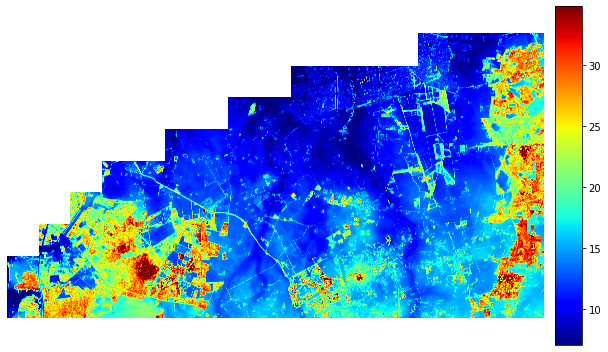

In [33]:
#For reference the 1st DSM appears as follows

dsmfig = rd.rdShow(dsm, ignore_colours=[0], axes=False, cmap='jet', figsize=(9,5))

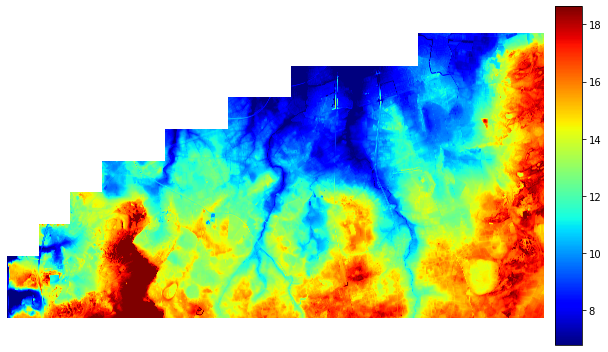

In [34]:
#For reference the 1st DTM appears as follows

dtmfig = rd.rdShow(dtm, ignore_colours=[0], axes=False, cmap='jet', figsize=(9,5))

# Complete Filling

### Depression-filling is often used to fill in all the depressions in a DEM to the level of their lowest outlet or spill-point

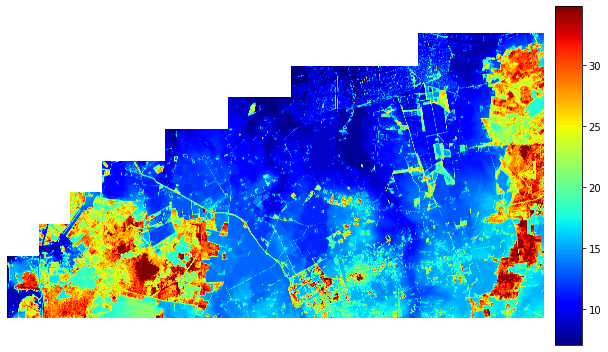

In [35]:
dsm_fill = rd.FillDepressions(dsm, in_place=False)
dsm_fillfig = rd.rdShow(dsm_fill, ignore_colours=[0], axes=False, cmap='jet', vmin=dsmfig['vmin'], vmax=dsmfig['vmax'], figsize=(9,5))

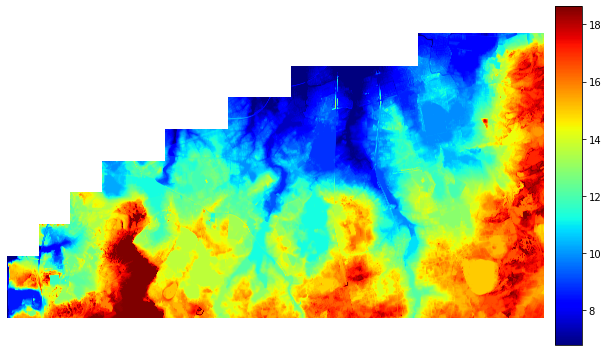

In [36]:
dtm_fill = rd.FillDepressions(dtm, in_place=False)
dtm_fillfig = rd.rdShow(dtm_fill, ignore_colours=[0], axes=False, cmap='jet', vmin=dtmfig['vmin'], vmax=dtmfig['vmax'], figsize=(9,5))

### The difference between the two

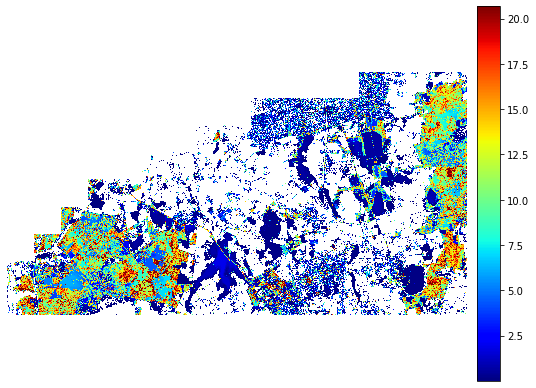

In [28]:
dsmdtmfill_diff = dsm_fill - dtm_fill
dsmdtmfill_diff_fig = rd.rdShow(dsmdtmfill_diff, ignore_colours=[0], axes=False, cmap='jet', figsize=(8,5.5))

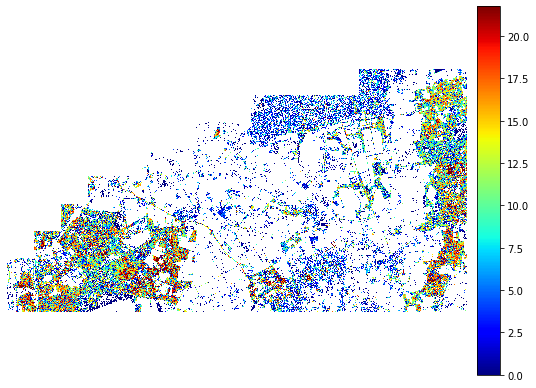

In [29]:
dsmdtm_diff = dsm - dtm
dsmdtm_difffig = rd.rdShow(dsmdtm_diff, ignore_colours=[0], axes=False, cmap='jet', figsize=(8,5.5))

# Defining a method for metadata of a tiff file

In [107]:
# RIO Function to read the original file's projection

def metadata(in_file):
    
    my_file = rio.open(in_file)
    
    print("Bounbox output is", my_file.bounds)
    print("Upper Left", my_file.transform * (0, 0))  #upper left 
    LR = my_file.transform * (my_file.width, my_file.height) #lower right   
    print("Lower Right ", LR) 
    Cent = my_file.xy((my_file.height // 2), (my_file.width // 2)) 
    print("Center", Cent) # Center of tiff
    print("Band-Index", my_file.indexes)
    my_proj = pyproj.Proj("+init=epsg:31370")  #EPSG:31370 for belgium map given
    left_bottom = my_proj(bounbox[0],bounbox[1], inverse=True)
    print("Left Bottom Co-ords", left_bottom)
    right_top = my_proj(bounbox[2],bounbox[3], inverse=True)
    print("Right Top Co-ords", right_top)
    print("Meta", my_file.meta)
             
metadata(dsmfile)

Bounbox output is BoundingBox(left=145000.0, bottom=238000.0, right=162000.0, top=247000.0)
Upper Left (145000.0, 247000.0)
Lower Right  (162000.0, 238000.0)
Center (153500.5, 242499.5)
Band-Index (1,)
Left Bottom Co-ords (4.295566245348728, 51.45214154368944)
Right Top Co-ords (4.540396248493145, 51.53292133320578)
Meta {'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9999.0, 'width': 17000, 'height': 9000, 'count': 1, 'crs': CRS.from_dict(init='epsg:31370'), 'transform': Affine(1.0, 0.0, 145000.0,
       0.0, -1.0, 247000.0)}


In [127]:
import geoio
img = geoio.GeoImage(dsmfile)
img.files
img.meta

file_name          : D:/BeCode/Maps/DSM_DHMVIIDSMRAS1m_k01/GeoTIFF/DHMVIIDSMRAS1
                     m_k01.tif
file_list          : ['D:/BeCode/Maps/DSM_DHMVIIDSMRAS1m_k01/GeoTIFF/DHMVIIDSMRA
                     S1m_k01.tif']
driver_name        : GTiff
no_data_value      : -9999.0
gdal_dtype         : 6
gdal_dtype_name    : Float32
pixels             : 153000000
shape              : (1, 17000, 9000)
geo_transform      : (145000.0, 1.0, 0.0, 247000.0, 0.0, -1.0)
resolution         : (1.0, 1.0)
extent             : (145000.0, 247000.0, 162000.0, 238000.0)
projection_string  : PROJCS["Belge 1972 / Belgian Lambert 72",GEOGCS["Belge 1972
                     ",DATUM["Reseau_National_Belge_1972",SPHEROID["Internationa
                     l 1924",6378388,297,AUTHORITY["EPSG","7022"]],TOWGS84[-106.
                     869,52.2978,-103.724,0.3366,-0.457,1.8422,-1.2747],AUTHORIT
                     Y["EPSG","6313"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","89
                     01"]],UNIT["

In [116]:
# GDALFunction to read the original file's projection:Gets information from a Raster data set

def get_geo_info(filename, band=1):
    
    sourceds = gdal.Open(filename)
    
    ndv = sourceds.GetRasterBand(band).GetNoDataValue()
    xsize = sourceds.RasterXSize
    ysize = sourceds.RasterYSize
    geot = sourceds.GetGeoTransform()
    projection = osr.SpatialReference()
    projection.ImportFromWkt(sourceds.GetProjectionRef())
    datatype = sourceds.GetRasterBand(band).DataType
    datatype = gdal.GetDataTypeName(datatype)
    return ndv, xsize, ysize, geot, projection, datatype

In [111]:
import exifread
# Open image file for reading (binary mode)
f = open(dsmfile, 'rb')

# Return Exif tags
tags = exifread.process_file(f)

# Print the tag/ value pairs
for tag in tags.keys():
    if tag not in ('JPEGThumbnail', 'TIFFThumbnail', 'Filename', 'EXIF MakerNote'):
        print ("Key: %s, value %s" % (tag, tags[tag]))

Key: Image ImageWidth, value 17000
Key: Image ImageLength, value 9000
Key: Image BitsPerSample, value 32
Key: Image Compression, value Adobe Deflate
Key: Image PhotometricInterpretation, value 1
Key: Image SamplesPerPixel, value 1
Key: Image PlanarConfiguration, value 1
Key: Image Predictor, value None
Key: Image TileWidth, value 512
Key: Image TileLength, value 512
Key: Image TileOffsets, value [99596542, 99597587, 99598632, 99599677, 99600722, 99601767, 99602812, 99603857, 99604902, 99605947, 99606992, 99608037, 99609082, 99610127, 99611172, 99612217, 99613262, 99614307, 99615352, 99616397, ... ]
Key: Image TileByteCounts, value [1045, 1045, 1045, 1045, 1045, 1045, 1045, 1045, 1045, 1045, 1045, 1045, 1045, 1045, 1045, 1045, 1045, 1045, 1045, 1045, ... ]
Key: Image SampleFormat, value Float
Key: Image Tag 0x87AF, value [1, 1, 0, 8, 1024, 0, 1, 1, 1025, 0, 1, 1, 1026, 34737, 32, 0, 2049, 34737, 11, 32, 2054, 0, 1, 9102, 2062, 34736, 7, 0, 3072, 0, 1, 31370, 3076, 0, 1, 9001]
Key: Image

# Loading multiple zip from url    (Need to work on)

In [108]:
import zipfile
import requests

In [109]:
downloadurl = 'http://www.geopunt.be/download?container=dhm-vlaanderen-ii-dsm-raster-1m&title=Digitaal%20Hoogtemodel%20Vlaanderen%20II,%20DSM,%20raster,%201m'

In [110]:
req = requests.get(downloadurl)

In [111]:
req.headers

{'Cache-Control': 'private', 'Content-Type': 'text/html; charset=utf-8', 'Content-Encoding': 'gzip', 'Last-Modified': 'Wed, 20 Nov 2013 15:03:37 GMT', 'Vary': 'Accept-Encoding', 'Server': 'Microsoft-IIS/8.5', 'Set-Cookie': 'ASP.NET_SessionId=lpq4a4yc3oqo3qyxztybt3yz; path=/; HttpOnly, geopunt_language=nl; expires=Fri, 31-Dec-9999 23:59:59 GMT; path=/', 'X-UA-Compatible': 'IE=edge', 'Date': 'Thu, 09 Jul 2020 21:05:35 GMT', 'Content-Length': '19605'}

In [112]:
req.url

'http://www.geopunt.be/download?container=dhm-vlaanderen-ii-dsm-raster-1m&title=Digitaal%20Hoogtemodel%20Vlaanderen%20II,%20DSM,%20raster,%201m'

In [113]:
with open ('finename', 'wb') as f: #filename is given the name for dowloaded file
    f.write(req.content)

In [115]:
filepath = ''     #filename is given the name for dowloaded file using rio
with rio.open(dsmfile) as src:
    print(src.profile)

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9999.0, 'width': 17000, 'height': 9000, 'count': 1, 'crs': CRS.from_dict(init='epsg:31370'), 'transform': Affine(1.0, 0.0, 145000.0,
       0.0, -1.0, 247000.0), 'blockxsize': 512, 'blockysize': 512, 'tiled': True, 'compress': 'deflate', 'interleave': 'band'}


# Geocoding

### To geolocate a query to an address and coordinates:

In [108]:
import requests
import json
address = "Molenstraat 52 Sint-Kat"
req = requests.get(f"http://loc.geopunt.be/geolocation/location?q={address}&c=1",)
for k,v in req.json()["LocationResult"][0].items():
    print(f"{k} : {v}")

Municipality : Sint-Katelijne-Waver
Zipcode : 2861
Thoroughfarename : Molenstraat
Housenumber : 52
ID : 1524026
FormattedAddress : Molenstraat 52, 2861 Sint-Katelijne-Waver
Location : {'Lat_WGS84': 51.06336314263222, 'Lon_WGS84': 4.587194565939624, 'X_Lambert72': 165312.83, 'Y_Lambert72': 194824.78}
LocationType : crab_huisnummer_afgeleidVanGebouw
BoundingBox : {'LowerLeft': {'Lat_WGS84': 51.06336314263222, 'Lon_WGS84': 4.587194565939624, 'X_Lambert72': 165312.83, 'Y_Lambert72': 194824.78}, 'UpperRight': {'Lat_WGS84': 51.06336314263222, 'Lon_WGS84': 4.587194565939624, 'X_Lambert72': 165312.83, 'Y_Lambert72': 194824.78}}


### Edge co-ordinates of tif file

In [82]:
import rasterio
import pyproj

my_file = rasterio.open(dsmfile)

bounbox = my_file.bounds

my_proj = pyproj.Proj("+init=epsg:31370")# EPSG:31370 for belgium map given

left_bottom = my_proj(bounbox[0],bounbox[1], inverse=True)
right_top = my_proj(bounbox[2],bounbox[3], inverse=True)

print (left_bottom)
print(right_top)
print("Bounbox output is", bounbox)

(4.295566245348728, 51.45214154368944)
(4.540396248493145, 51.53292133320578)
Bounbox output is BoundingBox(left=145000.0, bottom=238000.0, right=162000.0, top=247000.0)


### Finding pixel location in raster using coordinates

In [31]:
'''Finding pixel location in raster using coordinates?
using xarray.open_rasterio in combination with the method .sel()'''
#https://gis.stackexchange.com/questions/299787/finding-pixel-location-in-raster-using-coordinates


import xarray as xr

# We define a location
lon1, lat1 = (153500.000, 242500.000)    

# In this example I am reading a file with (time, x, y) as dimensions
xarr = xr.open_rasterio(dsmfile)

# Slice one of the bands
img = xarr[0, :, :] 

#Use the .sel() method to retrieve the value of the nearest cell close to your POI
val = img.sel(x=lon1, y=lat1, method="nearest")    
print("This is val: ", val)

This is val:  <xarray.DataArray ()>
array(10.96, dtype=float32)
Coordinates:
    band     int32 1
    y        float64 2.425e+05
    x        float64 1.535e+05
Attributes:
    transform:      (1.0, 0.0, 145000.0, 0.0, -1.0, 247000.0)
    crs:            +init=epsg:31370
    res:            (1.0, 1.0)
    is_tiled:       1
    nodatavals:     (-9999.0,)
    scales:         (1.0,)
    offsets:        (0.0,)
    AREA_OR_POINT:  Area
    VERTICAL_SRS:   EPSG:5110


In [118]:
# Another way
import rasterio as rio

infile = dsmfile
outfile = r'C:\Users\Santosh\Documents\GitHub\ANT-Theano-1-21\01.Python\Use cases\3D_houses\output.tif'
coordinates = (
    ( 153500.000, 242500.000) , # lon, lat of ~centre
)

# Your NxN window
N = 4

# Open the raster
with rio.open(infile) as dataset:

    # Loop through your list of coords
    for i, (lon, lat) in enumerate(coordinates):

        # Get pixel coordinates from map coordinates
        py, px = dataset.index(lon, lat)
        print('Pixel Y, X coords: {}, {}'.format(py, px))

        # Build an NxN window
        window = rio.windows.Window(px - N//2, py - N//2, N, N)
        print(window)

        # Read the data in the window
        # clip is a nbands * N * N numpy array
        clip = dataset.read(window=window)

        # You can then write out a new file
        meta = dataset.meta
        meta['width'], meta['height'] = N, N
        meta['transform'] = rio.windows.transform(window, dataset.transform)

        with rio.open(outfile.format(i), 'w', **meta) as dst:
            dst.write(clip)

Pixel Y, X coords: 4500, 8500
Window(col_off=8498, row_off=4498, width=4, height=4)


# Splitting raster into smaller chunks using GDAL

In [121]:
import os, sys
from osgeo import gdal

dset = gdal.Open(dsmfile)

width = dset.RasterXSize
height = dset.RasterYSize

print (width, 'x', height)

tilesize = 5000

for i in range(0, width, tilesize):
    for j in range(0, height, tilesize):
        w = min(i+tilesize, width) - i
        h = min(j+tilesize, height) - j
        gdaltranString = "gdal_translate -of GTIFF -srcwin "+str(i)+", "+str(j)+", "+str(w)+", " \
            +str(h)+" " + sys.argv[1] + " " + sys.argv[2] + "_"+str(i)+"_"+str(j)+".tif"
        os.system(gdaltranString)

17000 x 9000


In [35]:
#Another way

from osgeo import gdal

# open TIFF file (reading) mode and get dimensions
ds = gdal.Open(dsmfile, 0)
width = ds.RasterXSize
height = ds.RasterYSize

# define tile size and number of pixels to move in each direction
tile_size_x = 256
tile_size_y = 256
stride_x = 128
stride_y = 128

for x_off in range(0, width, stride_y):
    for y_off in range(0, height, stride_x):

        # read tile
        arr = ds.ReadAsArray(x_off, y_off, tile_size_x, tile_size_y)

    # export image using either PIL, gdal or some other library

In [122]:
# Another way
gdal_retile.bat -ps 512 512 -targetDir C:\example\direc dsmfile.tif

SyntaxError: invalid syntax (<ipython-input-122-37285cb811cf>, line 2)

In [128]:
import geopy
from geopy.geocoders import Nominatim


In [129]:
gc = Nominatim(user_agent="fintu-blog-geocoding-python")
gc.geocode("belgielei, 33, antwerpen")

Location(33, Belgiëlei, Haringrode, Antwerpen, Vlaanderen, 2018, België - Belgique - Belgien, (51.20781115, 4.421477456143639, 0.0))

In [130]:
gc.reverse("52.509669, 13.376294")

Location(Potsdamer Platz, Bellevuestraße, Botschaftsviertel, Tiergarten, Mitte, Berlin, 10785, Deutschland, (52.5098014, 13.375589791291057, 0.0))

In [131]:
geolocator = Nominatim(user_agent="fintu-blog-geocoding-python")
location = geolocator.reverse("51.207833, 4.421348")
print(location.address)
print((location.latitude, location.longitude))
print(location.raw)

35, Belgiëlei, Haringrode, Antwerpen, Vlaanderen, 2018, België - Belgique - Belgien
(51.2077843, 4.421389717954431)
{'place_id': 193520022, 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright', 'osm_type': 'way', 'osm_id': 502137949, 'lat': '51.2077843', 'lon': '4.421389717954431', 'display_name': '35, Belgiëlei, Haringrode, Antwerpen, Vlaanderen, 2018, België - Belgique - Belgien', 'address': {'house_number': '35', 'road': 'Belgiëlei', 'neighbourhood': 'Haringrode', 'city_district': 'Antwerpen', 'city': 'Antwerpen', 'county': 'Antwerpen', 'state': 'Vlaanderen', 'postcode': '2018', 'country': 'België - Belgique - Belgien', 'country_code': 'be'}, 'boundingbox': ['51.207708', '51.207853', '4.4212723', '4.4215089']}


In [133]:
import geoio
img = geoio.GeoImage(dsmfile)
xPixel, yPixel = img.proj_to_raster(lon, lat)

# Addon Extra Code may require in future

In [ ]:
# If more than one band available in tiff file


src_ds = gdal.Open(dsmfile)
if src_ds is None:
    print ('Unable to open', dsm)
    sys.exit(1)

print ("[ RASTER BAND COUNT ]: ", src_ds.RasterCount)
for band in range( src_ds.RasterCount ):
    band += 1
    print ("[ GETTING BAND ]: ", band)
    srcband = src_ds.GetRasterBand(band)
    if srcband is None:
        continue

    stats = srcband.GetStatistics( True, True )
    if stats is None:
        continue

    print ("[ STATS ] =  Minimum=%.3f, Maximum=%.3f, Mean=%.3f, StdDev=%.3f" % ( \
                stats[0], stats[1], stats[2], stats[3] ))

In [78]:
from osgeo import osr, gdal

# get the existing coordinate system
ds = gdal.Open(dsmfile)
old_cs= osr.SpatialReference()
old_cs.ImportFromWkt(ds.GetProjectionRef())

# create the new coordinate system
wgs84_wkt = """
GEOGCS["WGS 84",
    DATUM["WGS_1984",
        SPHEROID["WGS 84",6378137,298.257223563,
            AUTHORITY["EPSG","7030"]],
        AUTHORITY["EPSG","6326"]],
    PRIMEM["Greenwich",0,
        AUTHORITY["EPSG","8901"]],
    UNIT["degree",0.01745329251994328,
        AUTHORITY["EPSG","9122"]],
    AUTHORITY["EPSG","4326"]]"""
new_cs = osr.SpatialReference()
new_cs .ImportFromWkt(wgs84_wkt)

# create a transform object to convert between coordinate systems
transform = osr.CoordinateTransformation(old_cs,new_cs) 

#get the point to transform, pixel (0,0) in this case
width = ds.RasterXSize
height = ds.RasterYSize
gt = ds.GetGeoTransform()
minx = gt[0]
miny = gt[3] + width*gt[4] + height*gt[5] 

#get the coordinates in lat long
latlong = transform.TransformPoint(x,y) 

In [134]:
from ipyleaflet import Map
m = Map(center=(52.204793, 360.121558),zoom=4, scroll_wheel_zoom=True)

In [ ]:
#Python PIL For Loop to work with Multi-image TIFF


from PIL import Image
import numpy as np

def read_tiff(path):
    """
    path - Path to the multipage-tiff file
    """
    img = Image.open(path)
    images = []
    for i in range(img.n_frames):
        img.seek(i)
        images.append(np.array(img))
    return np.array(images)

In [ ]:
# importing required modules 
from zipfile import ZipFile 
  
# specifying the zip file name 
file_name = "my_python_files.zip"
  
# opening the zip file in READ mode 
with ZipFile(file_name, 'r') as zip: 
    # printing all the contents of the zip file 
    zip.printdir() 
  
    # extracting all the files 
    print('Extracting all the files now...') 
    zip.extractall() 
    print('Done!') 

original tif meta data: {'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9999.0, 'width': 17000, 'height': 9000, 'count': 1, 'crs': CRS.from_dict(init='epsg:31370'), 'transform': Affine(1.0, 0.0, 145000.0,
       0.0, -1.0, 247000.0)}
original tif bounds: BoundingBox(left=145000.0, bottom=238000.0, right=162000.0, top=247000.0)


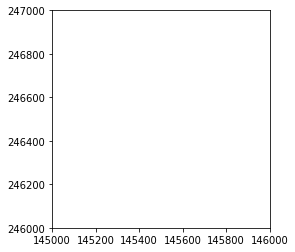

cropped tif meta data: {'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9999.0, 'width': 1000, 'height': 1000, 'count': 1, 'crs': CRS.from_dict(init='epsg:31370'), 'transform': Affine(1.0, 0.0, 145000.0,
       0.0, -1.0, 247000.0)}
cropped tif bounds: BoundingBox(left=145000.0, bottom=246000.0, right=146000.0, top=247000.0)


In [93]:
# numpy for arrays
import numpy as np
# rasterio for tif access
import rasterio as rio


# tif path
k15_path = dsmfile
# open and store tif
k15_tif = rio.open(k15_path)
# pixel data from tif
k15_data = np.array(k15_tif.read(1))
# file data tif
k15_meta = k15_tif.meta
print(f"original tif meta data: {k15_meta}")
# lamber72 box of tif
k15_bounds = k15_tif.bounds
print(f"original tif bounds: {k15_bounds}")
# crop a 1000x1000 square out of the array
k15_arr = k15_data[:1000,:1000]

# if you don't change width and height
# the cut will be same size as original tif
crop_width = k15_meta["width"] = 1000
crop_height = k15_meta["height"] = 1000
# transform needs to be edited so the crop has correct coords
k15_meta["transform"] = from_bounds(
    k15_bounds.left,              # new left-most coord
    k15_bounds.top - crop_height, # new bottom-most coord
    k15_bounds.left + crop_width, # new right-most coord
    k15_bounds.top,               # new top-most coord
    crop_width, crop_height)      # correct width & height

# open a new file in write mode as destination
# **meta is the **kwargs passed to the tif
with rio.open("./cut.tif", "w", **k15_meta) as destination:
    # write the pixel data with the **meta data
    destination.write(k15_arr, indexes=1)
# open the cropped tif we wrote
crop = rio.open("./cut.tif")
# plot the cropped tif
show(crop)
# print the cropped meta data
print(f"cropped tif meta data: {crop.meta}")
# print the cropped bounds
print(f"cropped tif bounds: {crop.bounds}")

In [126]:
import os, gdal

in_path = 'D:/BeCode/Maps/DSM_DHMVIIDSMRAS1m_k01/GeoTIFF'
input_filename = 'DHMVIIDSMRAS1m_k01.tif'

out_path = 'D:/BeCode/Maps/DSM_DHMVIIDSMRAS1m_k01/GeoTIFF'
output_filename = 'tile_'

tile_size_x = 1000
tile_size_y = 1000

ds = gdal.Open(in_path + input_filename)
band = ds.GetRasterBand(1)
xsize = band.XSize
ysize = band.YSize

for i in range(0, xsize, tile_size_x):
    for j in range(0, ysize, tile_size_y):
        com_string = "gdal_translate -of GTIFF -srcwin " + str(i)+ ", " + str(j) + ", " + str(tile_size_x) + ", " + str(tile_size_y) + " " + str(in_path) + str(input_filename) + " " + str(out_path) + str(output_filename) + str(i) + "_" + str(j) + ".tif"
        os.system(com_string)

RuntimeError: D:/BeCode/Maps/DSM_DHMVIIDSMRAS1m_k01/GeoTIFFDHMVIIDSMRAS1m_k01.tif: No such file or directory

In [138]:
 gdal_retile.py targetDir D:/BeCode/Maps/DSM_DHMVIIDSMRAS1m_k01/GeoTIFF  dsmfile

SyntaxError: invalid syntax (<ipython-input-138-83816a1a9aa9>, line 1)

In [139]:
import os, gdal

in_path = 'D:/BeCode/Maps/DSM_DHMVIIDSMRAS1m_k01/GeoTIFF'
input_filename = 'DHMVIIDSMRAS1m_k01.tif'

out_path = 'D:/BeCode/Maps/DSM_DHMVIIDSMRAS1m_k01/GeoTIFF'
output_filename = 'tile_'

tile_size_x = 1000
tile_size_y = 1000

ds = gdal.Open(dsmfile)
band = ds.GetRasterBand(1)
xsize = band.XSize
ysize = band.YSize

for i in range(0, xsize, tile_size_x):
    for j in range(0, ysize, tile_size_y):
        com_string = "gdal_translate -of GTIFF -srcwin " + str(i)+ ", " + str(j) + ", " + str(tile_size_x) + ", " + str(tile_size_y) + " " + str(in_path) + str(input_filename) + " " + str(out_path) + str(output_filename) + str(i) + "_" + str(j) + ".tif"
        os.system(com_string)